# Analise do Núcleo Celular de Tumores Malignos e Benignos presentes na mama de pacientes femininos

## Aqui faço uma análise do dataset de Diagnóstico de Câncer de mama, os dados estão presentes no link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). A ideia é apartir da característica de cada célula, classificá-la como sendo de um tumor Maligno - M ou Benigno - B

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Importando o dataset e separando a variavel alvo e as variaveis usadas para a classificação

In [2]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.drop(['diagnosis', 'id', 'Unnamed: 32'], axis = 1)
y = dataset['diagnosis'].values

### É interessante verificar se existe desbalanceamento entre os valores possíveis da classe alvo, para que o algoritmo não seja acurado porém inútil em cenário real. Por exemplo, caso apenas 1% dos tumores na fase de treinamento seja maligno, bastaria que classificar todos os tumores como benignos que se obteria 99% de acerto.

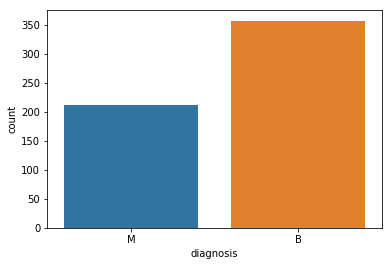

In [3]:
ax = sns.countplot(x="diagnosis", data=dataset)

### Há mais tumores classificados como benignos do que malignos. Mas a diferença não configura desbalanceamento

### Agora temos que lidar com a variavel alvo, que esta na forma M/B para designar Maligno/Benigno. Temos que transformar isso em número para a aplicação dos algoritmos

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)    

### Agora iremos analisar a correlação entre as características da célula

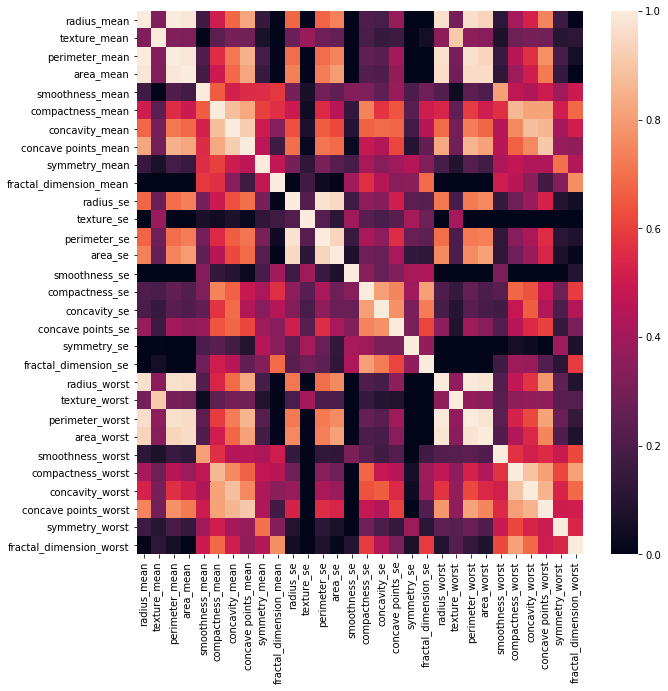

In [5]:
corr = X.corr()
ax = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmin=0, vmax=1)

### Com isso vemos que algumas variaveis estão claramente correlacionadas. Ou seja, pode-se excluir algumas colunas e diminuir a quantidade de parametros do nosso futuro classificador sem prejuízos. Por exemplo, sabe-se que obviamente o perimetro e o raio das células estão correlacionados com a área da mesma. Portanto, a partir daqui trabalharei apenas com a area da célula.

In [6]:
lista = ['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'radius_worst', 'radius_se', 'radius_mean']
X = X.drop(lista, axis=1)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
texture_mean               569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
texture_se                 569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
texture_worst              569 non-null float64
area_worst                 569 non-null float64
smoothness_worst           569 

### Restam então apenas 25 parametros para ser usador pelo modelo. O próximo passo é separar nosso conjunto de dados em treino e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### O segundo passo é normalizar nossos dados, isso ajuda o algoritmo a convergir mais rápido e evita problemas com a diferença de dimensão das variáveis

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Para o classificador, será usado uma SVC(Support Vector Machine Classifier) com kernel rbf. Pois, apresentou o melhor desempenho dentre varios testados

In [10]:
classifier = SVC(kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Após treinado, o modelo classificará o conjunto teste. Guardando o resultado na variável y_pred

In [11]:
y_pred = classifier.predict(X_test)

### Vamos visualizar a matriz de confusão para avaliar o modelo

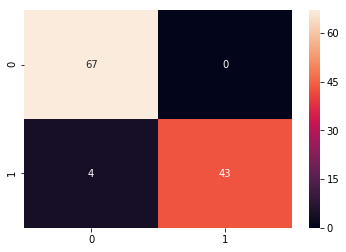

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

### Por fim, utilizarei k-fold cross validation com k = 10 para avaliar o modelo com maior rigor

In [13]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
std = accuracies.std()
print("Média de acurácia do algoritmo: %f Desvio Padrão: %f" % (mean, std))

Média de acurácia do algoritmo: 0.971594 Desvio Padrão: 0.021903


### O modelo se saiu muito bem, além de ser um modelo simples.